# Assignment 2 - Due Friday February 23rd, at 11:59pm

Your completed assignment should be saved in your Bitbucket mp248 repository in the file **Assignment.2/Assignment.2.ipynb**.   

Please ensure you do not have a copy of the course repository inside your personal mp248 Bitbucket repository. This assignment uses many csv files (from the course repository).  **Do not include** these with your homework, and do not store them on your mp248 repository.  The issue here is that if you store large files in your mp248 repository it slows down the grading script substantially and makes it more difficult for us to give you timely feedback before the due date.

**Do your work in a copy of this i-python notebook.**

**Ensure you label your code blocks** eg: (1)(a), (2)(b), (2)(b)continued, etc.


 

## Problem 1

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^3+1}{3z^2}$$

In this problem we ask you to use Sympy to find:

 (a) The points in the plane where Newton's method fails after 2 or 3 iterations. Notice that $N(z) = \frac{2z^2+1}{3z^2}$ which is well-defined as long as $z \neq 0$.  Thus Newton's method fails on one iteration only for $z=0$. Find both closed-form expressions for your answers as well as floating-point approximations. Print the approximations in your notebook. Use the Python casting technique **complex(z)** to convert the Sympy complex number **z** to a floating point approximation. In your notebook also count the number of points, i.e. write "The number of points where Newton's method fails after exactly two iterations is . . ."
 
 (b) The points in the plane where Newton's method is periodic of period 2 or 3.  A point is periodic of period 1 means $N(z) = z$.  Periodic of period 2 means $N(N(z))=z$ and $N(z) \neq z$.  Periodic of period 3 means $N(N(N(z))) = z$ while $N(z) \neq z$ and $N(N(z))\neq z$. 
 
 So for example, the points of period $1$ are the solution to the equation
 $$z = N(z) = z - \frac{z^3-1}{3z^2}$$
 which we can see are the roots of the original equation $z^3-1$. Similarly write-out the number of periodic points of period exactly 2, similarly for period 3.
 
 (c) Make a basins of attraction plot (feel free to use your code from the corresponding lab) for Newton's method for the polynomial $z^3-1$, using the colours red, green and blue.  Add to your plot the points where Newton's method eventually fails (part (a)) in 1, 2 or 3 iterations. Use yellow for these points.  Also add the periodic points of period 1, 2 and 3, using white for these points. Use a scatter plot so you can set the size of the points. Make points where Newton's method eventually fails smaller if it takes more iterations for them to fail, similarly make periodic points of larger period smaller in your plot. Ensure your image has a resolution of 800x800. Use **%matplotlib inline** to ensure your images save to your notebook. 


In [1]:
## Problem 1
import sympy as sp
import mpmath as mp

z = sp.Symbol('z')
roots = sp.solve(z**3-1)
## get the newton iterator.
f = z**3 - 1
N = z - f/f.diff(z)
print("Newt iterator: ")
sp.pprint(N)
N = sp.simplify(N)
sp.pprint(N)
print("\n")

Newt iterator: 
     3    
    z  - 1
z - ──────
        2 
     3⋅z  
   3    
2⋅z  + 1
────────
     2  
  3⋅z   




In [4]:
## Part (a)
print("(a) Fail after 2 iterations, i.e. N(z)=0")
S1 = sp.solve(N)
#sp.pprint(S1)
sp.pprint(S1)
print([complex(x) for x in S1])
print("Num failure after 2 ==", len(S1))

## TODO: fail 3 = N^-1(fail 2) easier.

## fail after 3 iterations, i.e. $N(N(z)) = 0$
print("\n(a) Fail after 3 iterations, i.e. N(N(z))=0")
N2 = sp.cancel(sp.simplify(N.subs(z, N)))
S2 = sp.solve(N2)
#sp.pprint(S2)
sp.pprint(S2)
print([complex(x) for x in S2])
print("Num failure after 3 ==", len(S2))

(a) Fail after 2 iterations, i.e. N(z)=0
⎡  2/3    2/3    2/3        2/3    2/3     ⎤
⎢-2      2      2   ⋅√3⋅ⅈ  2      2   ⋅√3⋅ⅈ⎥
⎢──────, ──── - ─────────, ──── + ─────────⎥
⎣  2      4         4       4         4    ⎦
[(-0.7937005259840997+0j), (0.3968502629920499-0.6873648184993013j), (0.3968502629920499+0.6873648184993013j)]
Num failure after 2 == 3

(a) Fail after 3 iterations, i.e. N(N(z))=0
⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                            

[(-1.433775499273943+0j), (0.439648664682661-0.39425712686739367j), (0.439648664682661+0.39425712686739367j), (0.7168877496369715-1.2416860056949517j), (0.7168877496369715+1.2416860056949517j), (0.12161235514889676+0.5778754757887876j), (0.12161235514889676-0.5778754757887876j), (-0.5612610198315577+0.18361834892139395j), (-0.5612610198315577-0.18361834892139395j)]
Num failure after 3 == 9


In [9]:
## Part (b)
## periodic points of period 2, i.e. N(N(z)) = z but N(z) \neq z.
N2 = sp.simplify(N.subs(z, N))

## solutions to N(N(z))=z are roots of N2-z, 
## so we divide it by z**3-1 to get just the
## periodic points of period 2.
N2z = sp.cancel(sp.simplify(N2 - z)/(z**3-1))
#sp.pprint(N2z)
T2 = sp.solve(N2z)
T2r = [complex(x) for x in T2]

## periodic points of period 2 can't be periodic points of period three
## so we need to only divide by z**3-1
N3 = sp.simplify(N2.subs(z, N))
N3z = sp.cancel(sp.simplify(N3 - z)/(z**3-1))

# get the numerator.
num3 = N3z.args[2]
# convert to an mpmath polynomial
pnum3 = sp.poly(num3).coeffs()
print(pnum3)
print("\n Periodic of period 2.")
print(T2r)
print("Num period 2 pts: ", len(T2r))

[19456, 98368, 195820, 140530, 60493, 14413, 2149, 196, 16]

 Periodic of period 2.
[(0.538608672507971-0.4172044837492512j), (0.538608672507971+0.4172044837492512j), (0.09200534524563808+0.6750510349651416j), (0.09200534524563808-0.6750510349651416j), (-0.630614017753609+0.2578465512158904j), (-0.630614017753609-0.2578465512158904j)]
Num period 2 pts:  6


In [7]:
T3 = []
for i in range(len(pnum3)):
    if (i!=0):
        T3.append(0)
        T3.append(0)
    T3.append(pnum3[i])
T3 = list(T3)
print(T3)


[19456, 0, 0, 98368, 0, 0, 195820, 0, 0, 140530, 0, 0, 60493, 0, 0, 14413, 0, 0, 2149, 0, 0, 196, 0, 0, 16]


In [8]:
import numpy as np
T3r = list(np.roots(T3))
print("Periodic of period 3")
print(T3r)
print("Number periodic pts: ", len(T3r))


Periodic of period 3
[(-1.3228533938507803+0.2417451564585737j), (-1.3228533938507803-0.2417451564585737j), (0.4520692501904212+1.2664972227865277j), (0.4520692501904212-1.2664972227865277j), (0.8707841436603623+1.0247520663279508j), (0.8707841436603623-1.0247520663279508j), (-0.7094890359805981+0.22635598819502398j), (-0.7094890359805981-0.22635598819502398j), (-0.5983578868038101+0.12932136746874093j), (-0.5983578868038101-0.12932136746874093j), (-0.440615047740115+0.2347831080922359j), (-0.440615047740115-0.2347831080922359j), (0.158714481914679+0.7276135229632308j), (0.158714481914679-0.7276135229632308j), (0.5507745540659108+0.5012575347682198j), (0.5507745540659108-0.5012575347682198j), (0.01697938788271206+0.49897537867873776j), (0.01697938788271206-0.49897537867873776j), (0.18718335392182434+0.5828538142612795j), (0.18718335392182434-0.5828538142612795j), (0.4111745328820115+0.45353244679248317j), (0.4111745328820115-0.45353244679248317j), (0.42363565985738777+0.264192270586520

In [10]:
## Part (c)
z = sp.Symbol('z')

def basinplot(f, z, roots, rootcol, RMIN, RMAX, IMIN, IMAX, xres, yres):
    ## get iterable Newton method
    N = z - f/f.diff(z)
    DF = sp.lambdify(z, f.diff(z), "mpmath")
    IT = sp.lambdify(z, N, "mpmath")
    ## setup image array
    IM = np.ndarray(shape=(yres, xres, 3), dtype=float)
    ## iterate over image pixels
    for i in range(xres):
        for j in range(yres):
            z0 = (i/xres)*(RMAX-RMIN)+RMIN + ((j/yres)*(IMAX-IMIN)+IMIN)*1j
            z1 = z0
            DEV = 1.0 ## keep track of distance from root.
            while DEV > 0.1:
                if abs(DF(z0))<0.0001:
                    DEV = 0.0
                else:
                    z1 = IT(z0)
                    DEV = abs(z1-z0)
                    z0 = z1
            rootFound = False
            for k in range(len(roots)):
                if abs(roots[k]-z0)<0.2:
                    rootFound = True
                    IM[j,i] = rootcol[k]
            if rootFound == False:
                IM[j,i] = np.array([0.0, 0.0, 0.0])
    return IM
    

In [18]:
roots = sp.solve(z**3-1)
sp.pprint(roots)


⎡     1   √3⋅ⅈ    1   √3⋅ⅈ⎤
⎢1, - ─ - ────, - ─ + ────⎥
⎣     2    2      2    2  ⎦


In [22]:
IM = basinplot(z**3-1, z, [complex(r) for r in roots],\
          np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]), \
         -2.0, 2.0, -2.0, 2.0, 1200, 1200)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
print(IM.shape)

## let's parse S1 and S2 to get real and imaginary parts
X1 = [complex(x) for x in S1]
X2 = [complex(x) for x in S2]
for x in X1:
    print(x, end=' ')
print("\n")
for x in X2:
    print(x, end=' ')

(1200, 1200, 3)
(-0.7937005259840997+0j) (0.3968502629920499-0.6873648184993013j) (0.3968502629920499+0.6873648184993013j) 

(-1.433775499273943+0j) (0.439648664682661-0.39425712686739367j) (0.439648664682661+0.39425712686739367j) (0.7168877496369715-1.2416860056949517j) (0.7168877496369715+1.2416860056949517j) (0.12161235514889676+0.5778754757887876j) (0.12161235514889676-0.5778754757887876j) (-0.5612610198315577+0.18361834892139395j) (-0.5612610198315577-0.18361834892139395j) 

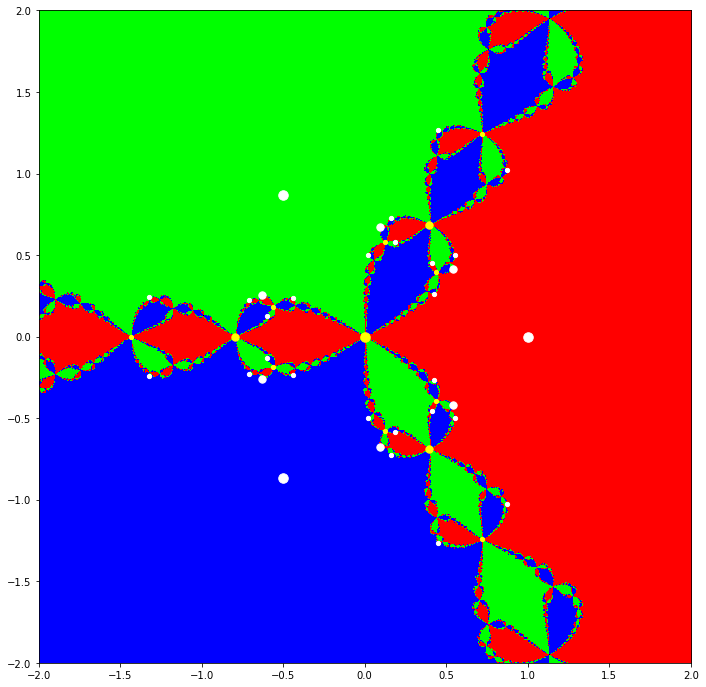

In [24]:
plt.close()
plt.figure(figsize=(12,12))

A = 90 ## scale point plots

## eventual failure points
plt.scatter([0.0], [0.0], s=1.0*A, c='yellow')
plt.scatter([x.real for x in X1], [x.imag for x in X1], s=0.6*A, c='yellow')
plt.scatter([x.real for x in X2], [x.imag for x in X2], s=0.2*A, c='yellow')

## and periodic pts of period one.
plt.scatter([complex(x).real for x in roots], [complex(x).imag for x in roots],\
            s=1.0*A, c='white')
## two and three
plt.scatter([x.real for x in T2r], [x.imag for x in T2r], s=0.6*A, c='white')
plt.scatter([x.real for x in T3r], [x.imag for x in T3r], s=0.2*A, c='white')

## basins image
plt.imshow(IM, extent=[-2.0, 2.0, -2.0, 2.0])

## Problem 2

In this problem we ask to you extend the code from **Part.II/Data.1.filled.ipynb**. As in class, load and parse the files in the **w.sask** and **w.vic** subdirectories to create the variable **mList**.  For this problem use the data from **mList**.

(a) Make a plot of daily precipitation, comparing two cities.  Make the plot for Saskatoon vs. Victoria.  On the x-axis you will have the daily precipitation for Victoria.  On the y-axis you will have the daily precipitation for Saskatoon.  Only plot dates where (in mList) we have precipitation data for both cities.  In particular, once you have combed through the data to find the precipitation data for the common dates, print a line in your python notebook of the form "Common data: n" where n is the number of days where we have precipitation data for both Victoria and Saskatoon. 

(b) Make a similar daily plot of mean temperatures of Victoria vs. Saskatoon.  Include the linear least squares interpolation in your plot. 

In [25]:
## Let's start by loading all the weather data, storing it in a list of dictionaries. An element of 
## this list will consist of the weather file headers, turned into a dict-object.  

## There will also be an additional weather-table key that will contain a list of dict objects. 
## containing the data the from a line of the file. 

import datetime as dt
import os as os
import fnmatch as fn
from operator import itemgetter

wsubdir = fn.filter(os.listdir('../data'), "w.*")
print("Weather subdirectories:", wsubdir)

## each file is of the form "key", "data" for several lines, then a blank space
## "Legend" then several (ignorable) lines, then a blank space
## "keys" separated by commas then
## remaining lines are the key values for each measurement. 

masterList = [] ## list of weather station dict objects

for wd in wsubdir:
    files = fn.filter(os.listdir('../data/'+wd), "eng-daily*.csv")
    for wdf in files:
        with open('../data/'+wd+'/'+wdf) as f:
            blanks=0
            content = f.readlines()
            FD = dict() ## file dict head.
            FL = [] ## file list.
            keys = []
            for LN in content:
                PL = LN.replace(u'\ufeff','').split(",")
                for i in range(len(PL)): # this removes the quotes around the numbers.
                    PL[i] = PL[i].translate({ord(c): None for c in '"\n'})
                if len(PL)==1 and PL[0]=='':
                    blanks+=1
                    if blanks==2 and PL[0]=='':
                        continue
                ## if blanks==0 we need to build the main dict
                ## if blanks==1 we ignore
                ## if blanks==2 we build the data.
                if blanks==0:
                    FD[PL[0]] = PL[1]
                    if PL[0]=="Station Name":
                        FD["Data"] = []
                if blanks==2:
                    if PL[0]=="Date/Time":
                        keys = PL
                    else:
                        FD["Data"].append( { keys[i] : PL[i] for i in range(len(keys)) } )
            masterList.append(FD)        

## make set of "Station Name"s. 
## use it to merge common station names into one (more useful) masterList.
sNames = { x['Station Name'] for x in masterList}
print("Station names:", sNames)

## return index of list of dict if dict keyed-element exists, -1 otherwise
def indIfExists(LOD, keyname, value):
    for i in range(len(LOD)):
        if LOD[i][keyname] == value:
            return i
    return -1

## run through masterlist, if that airport exists in mList we merge, if not, we copy it over.
mList = []
while len(masterList)>0:
    I = indIfExists(mList, 'Station Name', masterList[-1]['Station Name'])
    if I<0:
        mList.append(masterList.pop())
    else:
        mList[I]["Data"].extend(masterList.pop()["Data"])

## run through the weather station data, replace the date record with a datetime object
for WS in mList:
    badItems = set()
    for i in range(len(WS["Data"])):
        ## Let's convert the dict from strings to appropriate datetime and float objects
        ## dates with bad data we will flag and remove.
        for key, value in WS["Data"][i].items():
            if key=="Date/Time":
                WS["Data"][i][key] = dt.datetime.strptime(value, "%Y-%m-%d")
            elif key in [ 'Min Temp (°C)', 'Total Precip (mm)',  \
                          'Max Temp (°C)', 'Mean Temp (°C)']:
                try:
                    WS["Data"][i][key] = float(value)
                except:
                    badItems.add( i )
    #print(len(WS["Data"]), end=" ")
    WS["Data"] = [WS["Data"][i] for i in range(len(WS["Data"])) if i not in badItems]
    #print(len(WS["Data"]), "\n")
    WS["Data"] = sorted(WS["Data"], key=itemgetter("Date/Time"))

## now let's check for gaps.  We run through the weather station date and check the next day 
## is the previous day + one day.  If not, we start a new interval. 
print("Data intervals: ")
for WS in mList:
    print(WS['Station Name'], end=" ")
    ## find maximal consecutive date interval in data, then move on.
    i0 = 0 ## start interval
    i1 = 0 ## end interval
    ## if date interval [i0,i1] can be expanded to be consecutive, do it.
    ## if not, and if i1 not end of list, move to [i1+1,i1+1] and repeat
    while i1+1 != len(WS['Data']):
        ## if we can increment i1 and keep [i0,i1] consecutive, do it.
        if WS['Data'][i1+1]["Date/Time"]-WS['Data'][i0]["Date/Time"] != dt.timedelta(1+i1-i0):
            ## not consecutive. Move on.
            print(WS['Data'][i0]["Date/Time"].date(), "--", WS['Data'][i1]["Date/Time"].date(), "/ ", end='')
            i0 = i1+1
            i1 = i1+1
        else:
            i1 = i1+1
    print(WS['Data'][i0]["Date/Time"].date(), "--", WS['Data'][i1]["Date/Time"].date()) 

Weather subdirectories: ['w.sask', 'w.vic']
Station names: {'SASKATOON SRC', "SASKATOON DIEFENBAKER INT'L A", "VICTORIA INT'L A", 'VICTORIA INTL A'}
Data intervals: 
VICTORIA INT'L A 1970-01-01 -- 1992-12-05 / 1992-12-07 -- 1992-12-17 / 1992-12-19 -- 1992-12-27 / 1992-12-30 -- 1992-12-30 / 1993-01-01 -- 1993-01-04 / 1993-01-06 -- 1993-01-09 / 1993-01-11 -- 1993-01-19 / 1993-01-21 -- 1993-01-28 / 1993-01-30 -- 1993-02-01 / 1993-02-03 -- 1993-02-06 / 1993-02-08 -- 1993-02-08 / 1993-02-10 -- 1993-02-18 / 1993-02-21 -- 1993-03-04 / 1993-03-06 -- 1993-03-15 / 1993-03-17 -- 1993-03-18 / 1993-03-20 -- 1993-04-13 / 1993-04-15 -- 1993-05-02 / 1993-05-04 -- 1993-05-04 / 1993-05-06 -- 1993-05-23 / 1993-05-25 -- 1993-06-06 / 1993-06-09 -- 1993-08-06 / 1993-08-08 -- 1993-08-14 / 1993-08-16 -- 1993-10-20 / 1993-10-23 -- 1993-11-10 / 1993-11-12 -- 1993-11-27 / 1993-11-29 -- 1993-12-27 / 1993-12-30 -- 1996-05-04 / 1996-05-06 -- 1997-11-18 / 1997-11-20 -- 1998-02-25 / 1998-02-27 -- 2004-01-07 / 2004-01

In [26]:
## TODO: find concurrent dates in SASK and VIC with weather data.
##  we don't have to be fast about this, so we'll just go one by one, looking up
##  each date.
sasknames = ['SASKATOON SRC', "SASKATOON DIEFENBAKER INT'L A"]
vicnames = ['VICTORIA INTL A', "VICTORIA INT'L A"]

meanPairs = [] ## list of pairs of mean temperatures
rainPairs = [] ## list of pairs of daily rainfall

for WSv in mList:
    if WSv['Station Name'] in vicnames:
        ## run through dates from WS['Data']
        for x in WSv['Data']:
            ## now check if x['Date/Time'] is in the sasknames records.
            for WSs in mList:
                if WSs['Station Name'] in sasknames:
                    for y in WSs['Data']:
                        if x['Date/Time']==y['Date/Time']:
                            meanPairs.append( (x['Mean Temp (°C)'], y['Mean Temp (°C)'] ) )
                            rainPairs.append( (x['Total Precip (mm)'], y['Total Precip (mm)'] ) )
                            break

print("Number of matching dates with data: ", len(meanPairs) )

Number of matching dates with data:  15055


-19.502, 2.218
-22.178, 2.995, -0.040


Text(0,0.5,'Saskatoon')

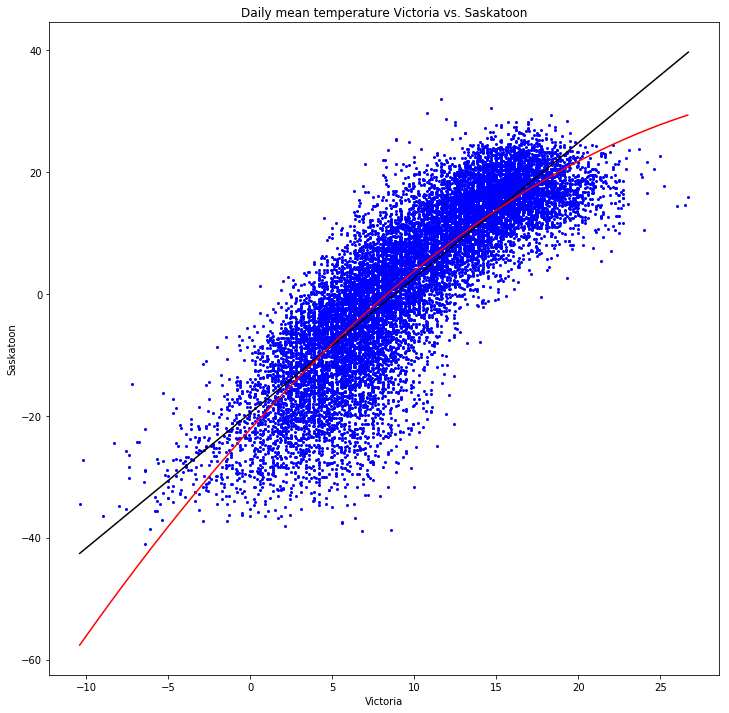

In [27]:
plt.close()
plt.figure(figsize=(12,12))

A = np.matrix([[1.0, x[0]] for x in meanPairs]).T
y = np.matrix([x[1] for x in meanPairs]).T
c = np.linalg.inv(A*A.T)*A*y
print("%1.3f, %1.3f" % (c[0,0], c[1,0]))

mpx, mpy = zip(*meanPairs)

plt.scatter( mpx, mpy, c='blue', s=4 )
plt.plot( [min(mpx), max(mpx)], [c[0,0]+min(mpx)*c[1,0], c[0,0]+max(mpx)*c[1,0]], color="black")

## and let's do a quadratic fit, just for fun.
A2 = np.matrix([[1.0, x[0], x[0]**2] for x in meanPairs]).T
y2 = np.matrix([x[1] for x in meanPairs]).T
c2 = np.linalg.inv(A2*A2.T)*A2*y2
print("%1.3f, %1.3f, %1.3f" % (c2[0,0], c2[1,0], c2[2,0]))

dom = np.arange(min(mpx), max(mpx), (max(mpx)-min(mpx))/1000 )
plt.plot( dom, [c2[0,0]+c2[1,0]*x+c2[2,0]*x**2 for x in dom], color="red")

plt.title('Daily mean temperature Victoria vs. Saskatoon')
plt.xlabel('Victoria')
plt.ylabel('Saskatoon')

Text(0,0.5,'Saskatoon')

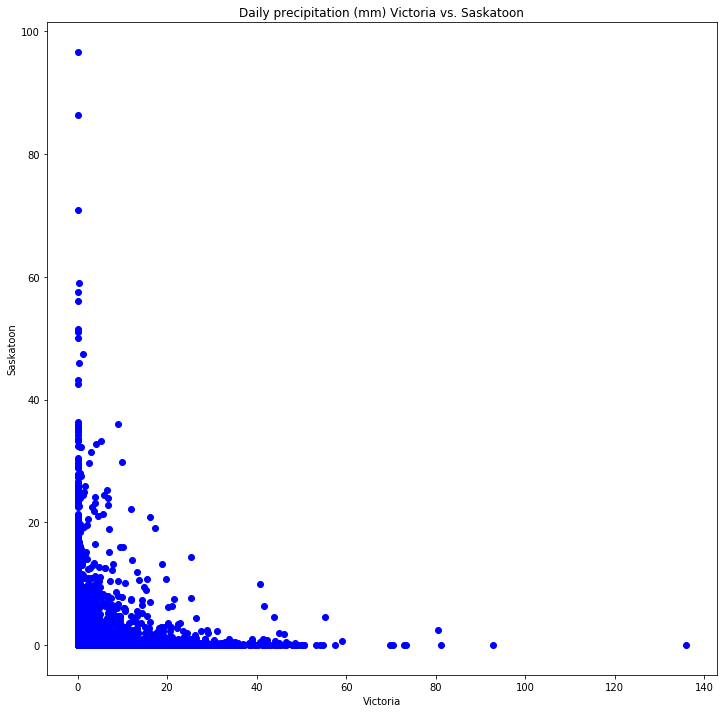

In [29]:
plt.close()
plt.figure(figsize=(12,12))

plt.plot( [x[0] for x in rainPairs], [x[1] for x in rainPairs], 'bo' )
plt.title('Daily precipitation (mm) Victoria vs. Saskatoon')
plt.xlabel('Victoria')
plt.ylabel('Saskatoon')

## Problem 3

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a list, $L$, where the $k$-th element of the list is the number of times it takes to turn $k+1$ into $1$ by applying the function $f$.  

Now consider the function $T(k) = L[0] + L[1] + \cdots + L[k-1]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for a linear and quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?  

In [30]:
import sys

## A short-form version of f.
def f(n):
    return n//2 if n%2==0 else 3*n+1

## pcList[k] is the number of applications of f one needs to apply to k to
## get to either 0 or 1. We call this the collatz number, i.e.
## pcList[n] is the collatz number for n. This is our precomputed list.
pcList = {1:0, 2:1, 3:7, 4:2, 5:5, 6:8}

## this routine computes the collatz number for n, extending the
## precomputed list in the process. It's a bit overkil for this
## homework assignment but it's quite CPU-time efficient.
def cCollatz(n):
    if n<1: sys.exit()
    tList = [n]
    while tList[-1] not in pcList.keys():
        tList.append(f(tList[-1]))
    ## we know tList[-1] is in pcList. 
    tList = tList[::-1]
    c = pcList[tList[0]]
    for i in range(1, len(tList)):
        pcList[tList[i]]=c+i
    return pcList[n]

for i in range(1,20000000):
    cCollatz(i)

In [31]:
import numpy as np

SL = [0]
for i in range(1, 20000000):
    SL.append(SL[-1] + pcList[i])

In [32]:
print(y.shape)
print(y[0])
print(y[2])
print(y[-1])

(15055, 1)
[[-15.6]]
[[-16.1]]
[[20.3]]


-36250.36, 86.69 (2, 10000)


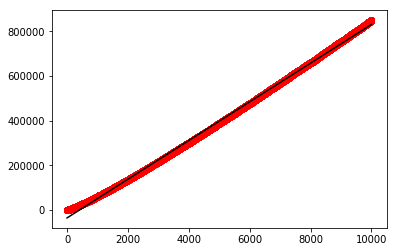

In [33]:
## linear fit 10000 pts

M = 10000
A = np.matrix([[1.0, i] for i in range(1,M+1)]).T
y = np.matrix([SL[i] for i in range(1,M+1)]).T

c = np.linalg.inv(A*A.T)*A*y
print("%1.2f, %1.2f" % (c[0,0], c[1,0]), A.shape)

plt.close()
plt.plot([i for i in range(1,M)], [SL[i] for i in range(1,M)], 'ro')
plt.plot([1, M-1], [c[0,0]+c[1,0], c[0,0]+c[1,0]*(M-1)], color="black")
plt.show()

-332421.89, 109.12


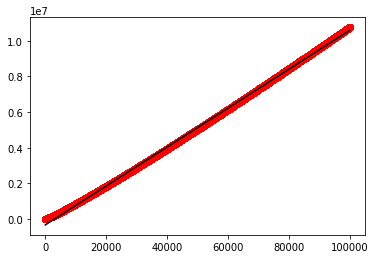

In [34]:
## linear fit 100000 pts
M = 100000
A = np.matrix([[1.0, i] for i in range(1,M+1)]).T
y = np.matrix([SL[i] for i in range(1,M+1)]).T

c = np.linalg.inv(A*A.T)*A*y
print("%1.2f, %1.2f" % (c[0,0], c[1,0]))

plt.close()
plt.plot([i for i in range(1,M)], [SL[i] for i in range(1,M)], 'ro')
plt.plot([1, M-1], [c[0,0]+c[1,0], c[0,0]+c[1,0]*(M-1)], color="black")
plt.show()

-3457340.56, 133.12


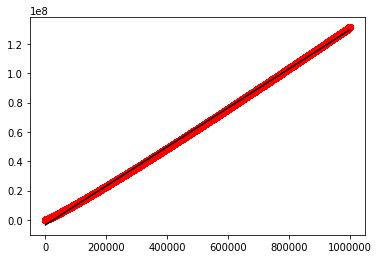

In [35]:
## linear fit 1000000 pts
M = 1000000
A = np.matrix([[1.0, i] for i in range(M)]).T
y = np.matrix([SL[i] for i in range(M)]).T

c = np.linalg.inv(A*A.T)*A*y
print("%1.2f, %1.2f" % (c[0,0], c[1,0]))

plt.close()
plt.plot([i for i in range(1,M)], [SL[i] for i in range(1,M)], 'ro')
plt.plot([1, M-1], [c[0,0]+c[1,0], c[0,0]+c[1,0]*(M-1)], color="black")
plt.show()

-14023.04, 73.36, 0.00133


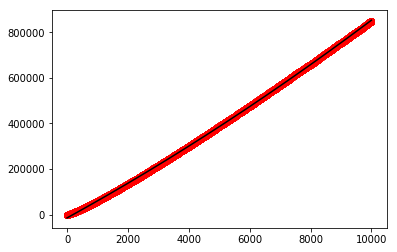

In [36]:
## quadratic fit 10000 pts

M = 10000
A = np.matrix([[1.0, i, i**2] for i in range(M)]).T
y = np.matrix([SL[i] for i in range(M)]).T

c = np.linalg.inv(A*A.T)*A*y
print("%1.2f, %1.2f, %1.5f" % (c[0,0], c[1,0], c[2,0]))

plt.close()
plt.plot([i for i in range(1,M)], [SL[i] for i in range(1,M)], 'ro')
dom = np.arange(1, M-1, 1)
plt.plot(dom, [c[0,0]+c[1,0]*x+c[2,0]*x**2 for x in dom], color="black")
plt.show()

-119942.68, 96.37, 0.00013


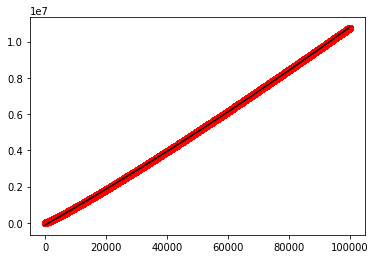

In [37]:
## quadratic fit 100000 pts

M = 100000
A = np.matrix([[1.0, i, i**2] for i in range(M)]).T
y = np.matrix([SL[i] for i in range(M)]).T

c = np.linalg.inv(A*A.T)*A*y
print("%1.2f, %1.2f, %1.5f" % (c[0,0], c[1,0], c[2,0]))

plt.close()
plt.plot([i for i in range(1,M)], [SL[i] for i in range(1,M)], 'ro')
dom = np.arange(1, M-1, 1)
plt.plot(dom, [c[0,0]+c[1,0]*x+c[2,0]*x**2 for x in dom], color="black")
plt.show()

-1295026.33, 120.14, 0.00001


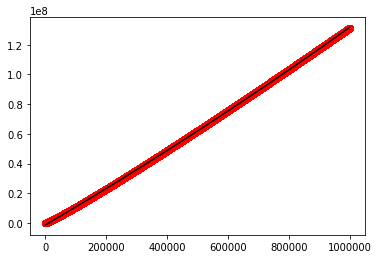

In [38]:
## quadratic fit 1000000 pts

M = 1000000
A = np.matrix([[1.0, i, i**2] for i in range(M)]).T
y = np.matrix([SL[i] for i in range(M)]).T

c = np.linalg.inv(A*A.T)*A*y
print("%1.2f, %1.2f, %1.5f" % (c[0,0], c[1,0], c[2,0]))

plt.close()
plt.plot([i for i in range(1,M)], [SL[i] for i in range(1,M)], 'ro')
dom = np.arange(1, M-1, 1)
plt.plot(dom, [c[0,0]+c[1,0]*x+c[2,0]*x**2 for x in dom], color="black")
plt.show()

Clearly there is no convergence.  Perhaps there is something closer to an exponential relationship?